In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

from ipywidgets import interact, interactive, fixed, interact_manual
plt.style.use('seaborn-whitegrid')


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [3]:
a = np.arange(0,10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
def f(x):
    plt.plot(a,a*x)
    plt.ylim(-30,30)
interact(f, x = 10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

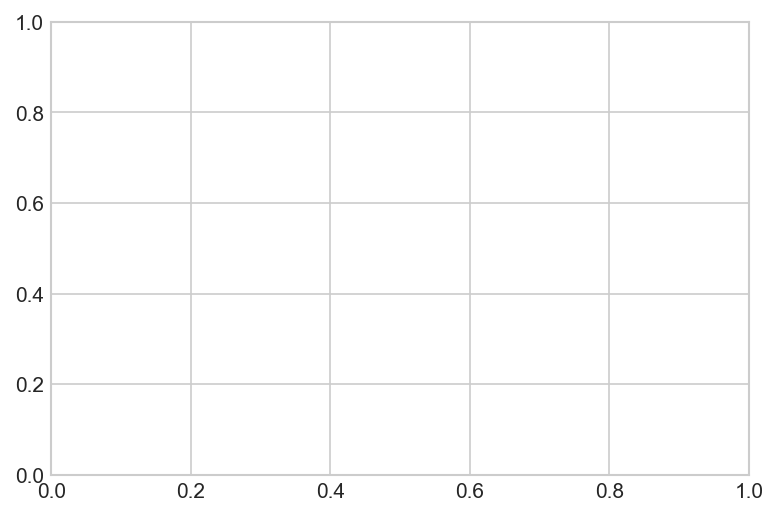

In [5]:
fig = plt.figure()
ax = plt.axes()

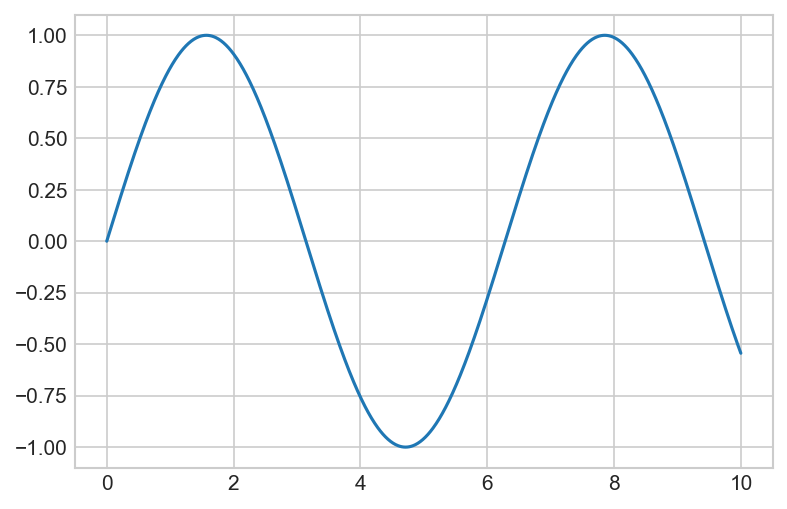

In [6]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

In [7]:
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

def stackbar(g):
    p1 = plt.bar(ind, menMeans, width, yerr=menStd)
    p2 = plt.bar(ind, womenMeans, width,
                 bottom=menMeans, yerr=womenStd)

    plt.ylabel('Scores')
    plt.title('Scores by group and gender')
    plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
    plt.yticks(np.arange(0, 81, 10))
    plt.legend((p1[0], p2[0]), ('Men', 'Women'))

interact(stackbar,g=['Men','Women','Both'])

interactive(children=(Dropdown(description='g', options=('Men', 'Women', 'Both'), value='Men'), Output()), _do…

<function __main__.stackbar(g)>

In [9]:
dataset = pd.DataFrame(columns=['menMeans','womenMeans','menStd','womenStd'], index=['G1','G2','G3','G4','G5'])
dataset
                       

,menMeans,womenMeans,menStd,womenStd
G1,NaN,NaN,NaN,NaN
G2,NaN,NaN,NaN,NaN
G3,NaN,NaN,NaN,NaN
G4,NaN,NaN,NaN,NaN
G5,NaN,NaN,NaN,NaN


In [10]:
N = 5
menMeans = (20, 35, 30, 35, 27)
#dataset.menMeans.iloc[[0,1,2,3,4]] = menMeans
dataset.loc[:, ('menMeans')] = menMeans

In [11]:
womenMeans = (25, 32, 34, 20, 25)
#dataset.womenMeans.iloc[[0,1,2,3,4]] = womenMeans
dataset.loc[:, ('womenMeans')] = womenMeans

In [12]:
menStd = (2, 3, 4, 1, 2)
#dataset.menStd.iloc[[0,1,2,3,4]] = menStd
dataset.loc[:, ('menStd')] = menStd

In [13]:
womenStd = (3, 5, 2, 3, 3)
#dataset.womenStd.iloc[[0,1,2,3,4]] = womenStd
dataset.loc[:, ('womenStd')] = womenStd

In [14]:
ind = np.arange(N)    # the x locations for the groups

In [15]:
width = 0.35       # the width of the bars: can also be len(x) sequence

In [16]:
dataset['Group'] = dataset.index
dataset

,menMeans,womenMeans,menStd,womenStd,Group
G1,20,25,2,3,G1
G2,35,32,3,5,G2
G3,30,34,4,2,G3
G4,35,20,1,3,G4
G5,27,25,2,3,G5


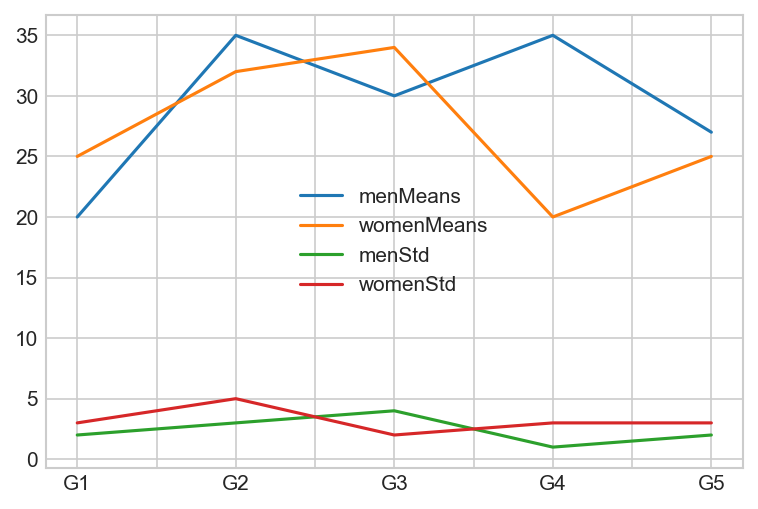

In [17]:
dataset.plot()

In [18]:
longdataset = pd.melt(dataset, id_vars=['Group'], value_vars=['menMeans','womenMeans','menStd','womenStd'])

In [19]:
#longdataset['Gender'] = df['variable'].apply(lambda x: 'Men' if men == 'Bill' else 'Women')

longdataset['Gender'] = longdataset['variable'].apply(lambda x: 'Women' if 'women' in x else 'Men')
longdataset['Measure'] = longdataset['variable'].apply(lambda x: 'Mean' if 'Means' in x else 'Std')
longdataset

,Group,variable,value,Gender,Measure
0,G1,menMeans,20,Men,Mean
1,G2,menMeans,35,Men,Mean
2,G3,menMeans,30,Men,Mean
3,G4,menMeans,35,Men,Mean
4,G5,menMeans,27,Men,Mean
5,G1,womenMeans,25,Women,Mean
6,G2,womenMeans,32,Women,Mean
7,G3,womenMeans,34,Women,Mean
8,G4,womenMeans,20,Women,Mean
9,G5,womenMeans,25,Women,Mean


In [20]:
columnlist = ['Gender','Measure']
widedataset = longdataset.pivot_table(index='Group', columns=columnlist, values='value')

In [21]:
widedataset

Gender   Men     Women    
Measure Mean Std  Mean Std
Group                     
G1        20   2    25   3
G2        35   3    32   5
G3        30   4    34   2
G4        35   1    20   3
G5        27   2    25   3

In [22]:
def plotfiltered(g):
    if g in ['Men','Women']:
        datatopivot = longdataset[longdataset['Gender']==g]
    else:
        datatopivot = longdataset
    columnlist = ['Gender','Measure']
    datatoplot = datatopivot.pivot_table(index='Group', columns=columnlist, values='value')
    datatoplot.plot()
#plotfiltered('Women')

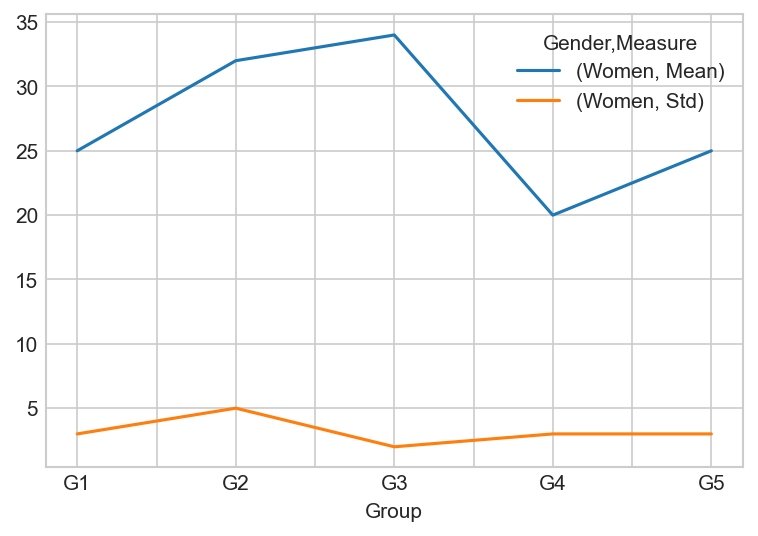

In [23]:
plotfiltered('Women')

In [24]:
interact(plotfiltered,g=['Men','Women','Both'])

interactive(children=(Dropdown(description='g', options=('Men', 'Women', 'Both'), value='Men'), Output()), _do…

<function __main__.plotfiltered(g)>

In [25]:
import ipywidgets as widgets
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.VBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [26]:
def f(x):
    return x
interact(f, x=widgets.Combobox(options=["Chicago", "New York", "Washington"], value="Chicago"));

interactive(children=(Combobox(value='Chicago', description='x', options=('Chicago', 'New York', 'Washington')…

In [27]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

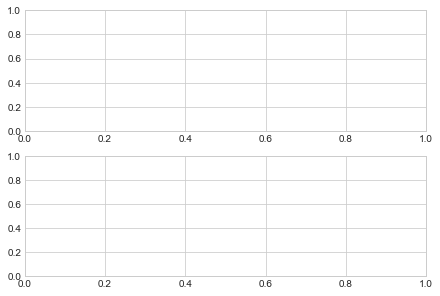

In [28]:
fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])